# Image Setup

Set up Image and Import Libraries

In [ ]:
from matplotlib import image
from matplotlib import pyplot
import numpy as np
import scipy
from scipy import ndimage
from scipy import signal
import math
from skimage.io import imread
from skimage.color import rgb2gray

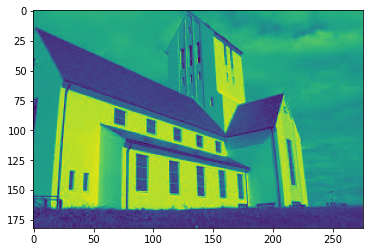

In [ ]:
gray_img = rgb2gray(imread('/content/image1.jfif'))
pyplot.imshow(gray_img)

# Canny Edge Detection

Function to apply canny-edge detection

In [ ]:
def canny_edge(image, sigma, tlow, thigh):
  # Formulate image into matrix
  np_img = np.array(image)

  # Create sobel filters to find horizontal, vertical edges
  Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
  Gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
  
  # Convolve both filters to the image to produce edge activations on image
  Ix = signal.convolve2d(np_img, Gx)
  Iy = signal.convolve2d(np_img, Gy)
  
  # Compute the magnitude of each gradient and its corresponding angle 
  # arctan function returns angles in range: [-pi/2, pi/2] keep this in mind when applying non-max suppression
  magnitudes = np.sqrt(np.add(np.square(Ix), np.square(Iy)))
  angles = np.arctan2(Iy, Ix)

  print("Image after applying Sobel operators")
  pyplot.imshow(magnitudes, cmap='gray')

  # Formulate empty matrix of zeros for when applying non-max suppression
  nms = np.zeros_like(magnitudes)      

  # Enforce non-maximum suppresion
  # For each pixel, if local maximum set to one and later apply element-wise multiplication to only activate certain edges
  for i in range(angles.shape[0]):
    for j in range(angles.shape[1]):
      
      # Check bounds to ensure neighbors can be searched
      if i - 1 < 0 or i + 1 >= angles.shape[0] or j - 1 < 0 or j + 1 >= angles.shape[1]:
        continue
      
      # Check direction of gradient on each step, and section off gradeint into local search spaces
      # For each search space, check neighboring pixels along gradient for local maximum
      # Any that aren't local maximum are suppressed
      # Angles correspond to gradient directions shown in image from lecture notes (Lecture 5: DNNs)
      
      if angles[i][j] > (math.pi/8) and angles[i][j] < (3 * (math.pi / 8)):
        if angles[i+1][j-1] > angles[i][j] or angles[i-1][j+1] > angles[i][j]:
          nms[i][j] = 0
        else:
          nms[i][j] = 1 
      elif angles[i][j] > (3 * (math.pi / 8)) and angles[i][j] < (5 * (math.pi / 8)):
        if angles[i][j-1] > angles[i][j] or angles[i][j+1] > angles[i][j]:
          nms[i][j] = 0
        else:
          nms[i][j] = 1
      elif angles[i][j] > (5 * (math.pi / 8)) and angles[i][j] < (7 * (math.pi / 8)):
        if angles[i-1][j-1] > angles[i][j] or angles[i+1][j+1] > angles[i][j]:
          nms[i][j] = 0
        else:
          nms[i][j] = 1
      elif angles[i][j] > (7 * (math.pi / 8)) and angles[i][j] < (9 * (math.pi / 8)):
        if angles[i-1][j] > angles[i][j] or angles[i+1][j] > angles[i][j]:
          nms[i][j] = 0
        else:
          nms[i][j] = 1
      elif angles[i][j] > (9 * (math.pi / 8)) and angles[i][j] < (11 * (math.pi / 8)):
        if angles[i-1][j+1] > angles[i][j] or angles[i+1][j-1] > angles[i][j]:
          nms[i][j] = 0
        else:
          nms[i][j] = 1
      elif angles[i][j] > (11 * (math.pi / 8)) and angles[i][j] < (13 * (math.pi / 8)):
        if angles[i][j-1] > angles[i][j] or angles[i][j+1] > angles[i][j]:
          nms[i][j] = 0
        else:
          nms[i][j] = 1
      elif angles[i][j] > (13 * (math.pi / 8)) and angles[i][j] < (15 * (math.pi / 8)):
        if angles[i+1][j+1] > angles[i][j] or angles[i-1][j-1] > angles[i][j]:
          nms[i][j] = 0
        else:
          nms[i][j] = 1
      else:
        if angles[i+1][j] > angles[i][j] or angles[i-1][j] > angles[i][j]:
          nms[i][j] = 0
        else:
          nms[i][j] = 1
  
  # Element-wise multiplication to activate only non-suppressed pixels
  nms_img = np.multiply(magnitudes, nms)
  hyst_img = np.copy(nms_img)

  # Enforce hysteresis using high / low threshold
  for i in range(hyst_img.shape[0]):
    for j in range(hyst_img.shape[1]):
      
      # Bounds-checking
      if i - 1 < 0 or i + 1 >= hyst_img.shape[0] or j - 1 < 0 or j + 1 >= hyst_img.shape[1]:
        continue
      
      # Check for high threshold
      if hyst_img[i][j] > thigh:
        hyst_img[i][j] = 1

        # Collect neighbors satisfying low threshold
        if hyst_img[i+1][j] > tlow:
          hyst_img[i+1][j] = 1
        if hyst_img[i-1][j] > tlow:
          hyst_img[i-1][j] = 1
        if hyst_img[i+1][j+1] > tlow:
          hyst_img[i+1][j+1] = 1
        if hyst_img[i+1][j-1] > tlow:
          hyst_img[i+1][j-1] = 1
        if hyst_img[i-1][j-1] > tlow:
          hyst_img[i-1][j-1] = 1
        if hyst_img[i-1][j+1] > tlow:
          hyst_img[i-1][j+1] = 1

  return nms_img, hyst_img

Image after applying Sobel operators


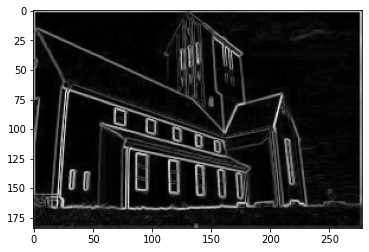

In [ ]:
img1 = image.imread('/content/image1.jfif')
nms, hyst = canny_edge(gray_img, 1, 3, 10)

Text(0.5, 1.0, 'Image after applying non-max suppression')

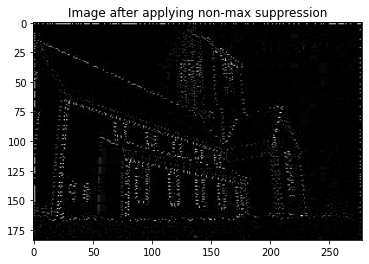

In [ ]:
pyplot.imshow(nms, cmap='gray')
pyplot.title("Image After Applying Non-Max Suppression")

Text(0.5, 1.0, 'Image after applying non-max suppression and hysteresis; Final Output by Canny Edge Detection Algorithm')

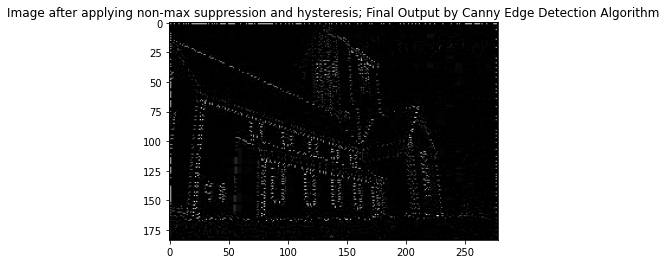

In [ ]:
pyplot.imshow(hyst, cmap='gray')
pyplot.title("Image After Applying Non-Max Suppression and Hysteresis; Final Output by Canny Edge Detection Algorithm")

# Seperable Gaussian Kernel Convolution

Implement our own 1D convolution function. Then, given a 2D signal and a 2D filter, check to see if filter is seperable. If it is then apply its row and column vectors across the 2D signal using a 1D convolution to implement the seperable convolution algorithm. Algorithm generalizable, therefore it should run for any sized seperable kernel and signal.

In [ ]:
def Conv1D(kernel, sig):
  all_conv_sig = []

  # Pad zeros to kernel
  for idx in range(len(sig)):
      if idx > len(kernel) - 1:
        kernel.append(0)
  
  # Loop range is arbitrary as perform an infinite sum across all required samples of output signal: y[n]
  # Yet for efficiency's sake apply 1000 repetitions

  # Outer loop is y[0], y[1], ...
  for i in range(1000):
    convolution_sum = 0
    
    # Inner loop is y[i] = sum(x[k] * h[i - k])
    for k in range(1000):
      
      # If difference becomes negative, exceeds max kernel index, or exceeds max signal index then skip (as product will be zero)
      if i - k < 0 or k > len(sig) - 1 or i - k > len(kernel) - 1:
          continue
      convolution_sum += sig[k] * kernel[i - k]
    
    # Point at which signal fully traversed, outputs zero therefore complete convolving
    if convolution_sum == 0:
      break
    all_conv_sig.append(convolution_sum)
  return all_conv_sig

def SeperableConvolution(kernel, sig):
  # Retrieve top-left column vector and top row vector
  # Create copies of column, row vectors as they will be modified
  v = kernel[:, 0]
  u = kernel[0]
  v2 = v
  u2 = u

  conv_res = []
  vert_conv = []

  # Reshape each vector to check for seperable kernel
  v = v.reshape(v.shape[0], 1)
  u = u.reshape(u.shape[0], 1).T

  # Check if kernel seperable by performing outer product on vectors u, v
  if not np.array_equal(np.matmul(v, u), kernel):
    print("Unseperable kernel, retry")
    return 
  print("Seperable kernel")

  # Seperable 2D convolution analogous to performing convolution with row vector, then with column vector of seperated kernel
  # Due to fact that convolution is associative, order does not matter
  # Evident from changing form of kernel to seperable-form
  
  # Apply custom Conv1D helper function to perform convolutions in following steps:

  # Perform 1D vertical convolution using column vector
  for col in sig.T:
    vert_conv.append(Conv1D(v2, col))
  vert_conv = np.array(vert_conv).T

  # Perform 1D horizontal convolution using row vector on previous result
  for row in vert_conv:
    conv_res.append(Conv1D(u2, row))
  conv_res = np.array(conv_res)
  
  # Confirm that performing operation by two 1D convolutions using u, v is equivalent to performing 2D convolution
  tst = signal.convolve2d(sig, kernel)
  if not np.array_equal(conv_res, tst):
    print("Seperable convolution incorrect")
    return
  
  print("Seperable convolution successful")
  return conv_res

In [ ]:
# Call seperable convolution function given a kernel and input signal
G = np.array([[1, 2, 6, 2, 1], [4, 8, 24, 8, 4], [7, 14, 42, 14, 7], [4, 8, 24, 8, 4], [1, 2, 6, 2, 1]]) # kernel
T_m = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [1, 2, 3, 4, 5]]) # signal
res = SeperableConvolution(G, T_m) # apply seperable convolution
res # displayed result

Seperable kernel
Seperable convolution successful


array([[   1,    4,   13,   24,   36,   42,   41,   14,    5],
       [  10,   35,  110,  175,  240,  265,  250,   85,   30],
       [  32,  108,  336,  508,  672,  724,  672,  228,   80],
       [  56,  184,  568,  824, 1056, 1112, 1016,  344,  120],
       [  57,  188,  581,  848, 1092, 1154, 1057,  358,  125],
       [  56,  184,  568,  824, 1056, 1112, 1016,  344,  120],
       [  32,  108,  336,  508,  672,  724,  672,  228,   80],
       [  10,   35,  110,  175,  240,  265,  250,   85,   30],
       [   1,    4,   13,   24,   36,   42,   41,   14,    5]])

# Harris Corner Detection


Apply corner detection algorithm using sobel operators to compute image gradients and a 3x3 sliding window to sum over image gradients. Compute the R-value upon each iteration and if greater than some threshold, add that point in image as a corner.

In [ ]:
def harris(img, threshold):
  corners = []

  # Compute change in image pixel-intensity for horizontal, vertical directions by applying 3x3 horizontal, vertical sobel operators
  # Do so in sliding-window fashion and upon each iteration, track sum of window's image-gradients
  # Compute the R-value then and check if corner exists inside the window by thresholding R 
  for i in range(img.shape[0] - 3):
    for j in range(img.shape[1] - 3):
        # Compute image gradients
        # Sobel filter changes depending on axis to reflect vertical versus horizontal changes in pixel-intensity (axis denoted by 0 or 1)
        Ix = ndimage.sobel(img[i:i+3, j:j+3], 0)
        Iy = ndimage.sobel(img[i:i+3, j:j+3], 1)
        Ixx = ndimage.sobel(img[i:i+3, j:j+3], 0)
        Ixy = ndimage.sobel(img[i:i+3, j:j+3], 1)
        Iyy = ndimage.sobel(img[i:i+3, j:j+3], 1)

        #Sum image gradients inside window
        Ixx_sum = np.sum(Ixx.sum(axis=0))
        Iyy_sum = np.sum(Iyy.sum(axis=0))
        Ixy_sum = np.sum(Ixy.sum(axis=0))

        #Generate R-value by forming matrix M to detect corners
        k = 0.05
        M = np.array([[Ixx_sum, Ixy_sum], [Ixy_sum, Iyy_sum]])
        R = np.linalg.det(M) - (k*(np.trace(M)**2))

        #Based on experimentation, value of 10 works well as a threshold to avoid cluttering with false corners
        if R > threshold:
          corners.append([i, j])
  
  # Once all corners detected, display  
  pyplot.scatter([row[1] for row in corners], [row[0] for row in corners], c='coral')
  pyplot.imshow(gray_img, cmap='gray')
  pyplot.show()

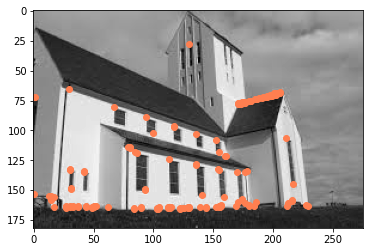

In [ ]:
harris(gray_img, 7)